In [1]:
%matplotlib inline

In [2]:
import sys
import os
sys.path.append(os.path.abspath('.'))

In [3]:
from pages.A_Explore_Preprocess_Dataset import load_dataset
filepath = "Loan_default.csv"
df = load_dataset(filepath)
df.head()

2025-05-13 22:41:33.020 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:41:33.146 
  command:

    streamlit run /opt/homebrew/Caskroom/miniforge/base/envs/paml-env/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-05-13 22:41:33.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:41:33.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:41:33.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:41:33.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:41:33.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-1

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
import numpy as np
# print basic statistics about dataset - number of features, distribution of target variable
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"Number of categorical features: {len(categorical_cols)}")

num_rows_with_missing = df.isnull().any(axis=1).sum()
print(f"% of rows with missing values: {num_rows_with_missing/df.shape[0] * 100:.2f}%")

print("Counts of 0 and 1:", df['Default'].value_counts())

Number of rows: 255347
Number of features: 18
Number of numeric features: 10
Number of categorical features: 8
% of rows with missing values: 0.00%
Counts of 0 and 1: Default
0    225694
1     29653
Name: count, dtype: int64


In [5]:
print(len(categorical_cols))
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print()

8
LoanID: 255347 unique values
LoanID
I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: count, Length: 255347, dtype: int64

Education: 4 unique values
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType: 4 unique values
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus: 3 unique values
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage: 2 unique values
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents: 2 unique values
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose: 5 unique values
LoanPurpose
Business     51298
Home         51286
Education    51005
Other    

In [6]:
df = df.drop(columns="LoanID")

In [7]:
len(df.columns)

17

In [9]:
!pip install -q seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use("seaborn-whitegrid")
sns.set_context("notebook")

In [12]:
display(df.head())
print("\nShape :", df.shape)
df.info()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0



Shape : (255347, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  i

Default
Non-default    225694
Default         29653
Name: count, dtype: int64 



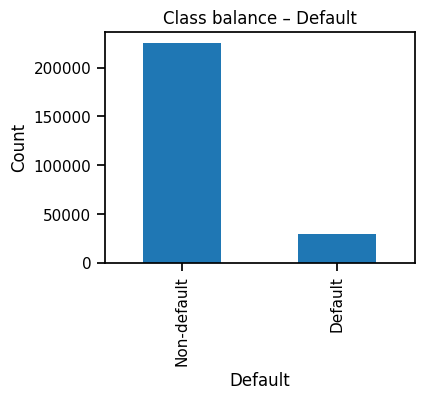

In [14]:
default_counts = df["Default"].value_counts().rename({0: "Non-default", 1: "Default"})
print(default_counts, "\n")
ax = default_counts.plot(kind="bar", figsize=(4,3))
ax.set_ylabel("Count")
ax.set_title("Class balance – Default")
plt.show()


,Missing %


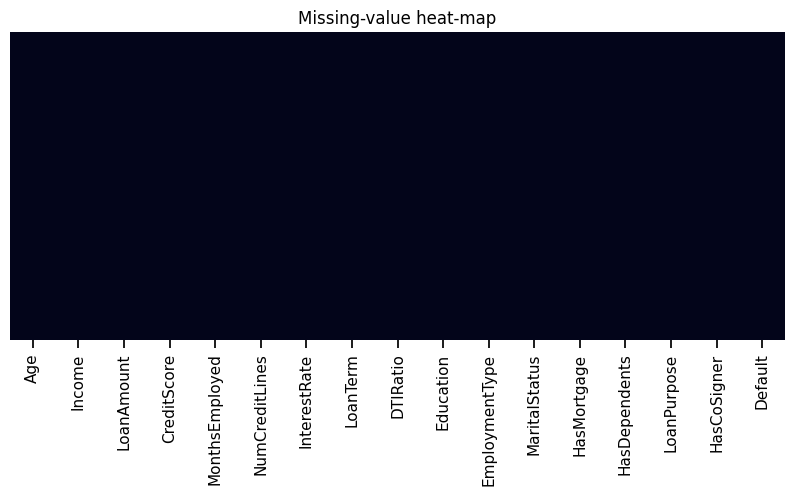

In [15]:
missing_pct = df.isna().mean().mul(100).sort_values(ascending=False)
display(missing_pct[missing_pct>0].to_frame("Missing %").head(20))

plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing-value heat-map")
plt.show()

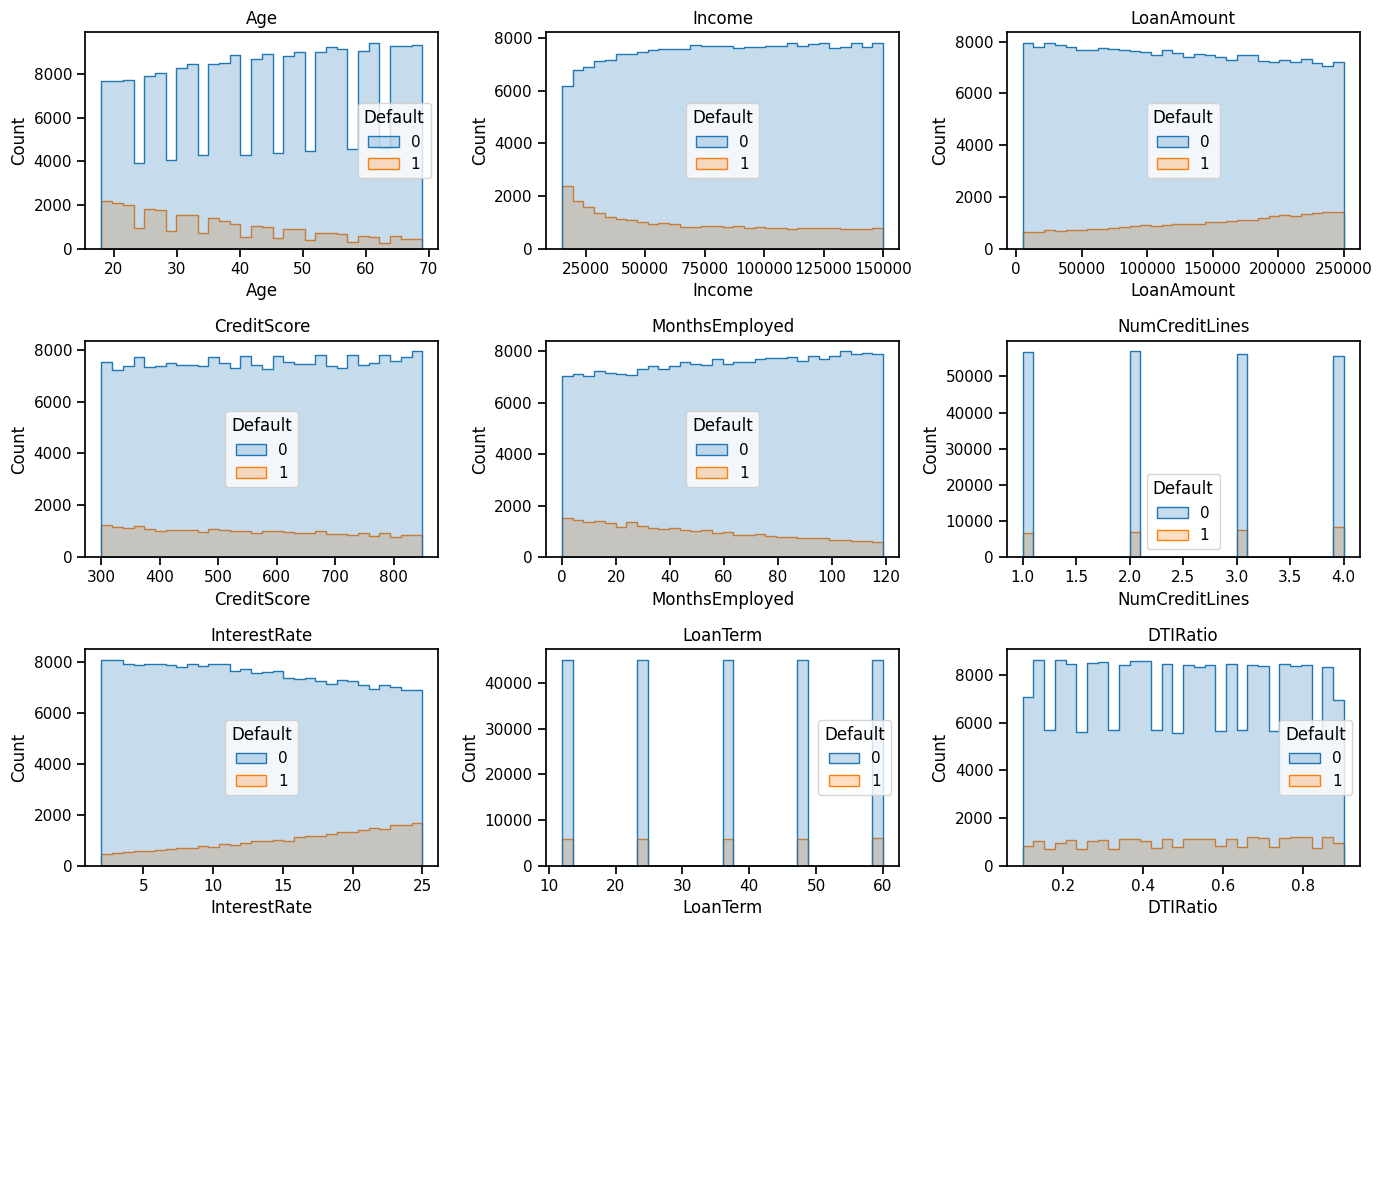

In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns.drop("Default")

fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3,
                         figsize=(14, 3*len(num_cols)//3 + 3))
axes = axes.ravel()
for ax, col in zip(axes, num_cols):
    sns.histplot(data=df, x=col, hue="Default",
                 bins=30, kde=False, element="step", ax=ax)
    ax.set_title(col)
for ax in axes[len(num_cols):]:
    ax.axis("off")
plt.tight_layout()
plt.show()


In [17]:
from scipy.stats import pointbiserialr
import pandas as pd

corr_dict = {}
for col in num_cols:
    r, p = pointbiserialr(df["Default"], df[col])
    corr_dict[col] = {"Point-biserial r": r, "p-value": p}

corr_df = (pd.DataFrame(corr_dict).T
           .sort_values("Point-biserial r", key=lambda s: np.abs(s), ascending=False))
display(corr_df.head(20))


,Point-biserial r,p-value
Age,-0.167783,0.000000e+00
InterestRate,0.131273,0.000000e+00
Income,-0.099119,0.000000e+00
MonthsEmployed,-0.097374,0.000000e+00
LoanAmount,0.086659,0.000000e+00
CreditScore,-0.034166,7.924422e-67
NumCreditLines,0.028330,1.680856e-46
DTIRatio,0.019236,2.449916e-22
LoanTerm,0.000545,7.831283e-01


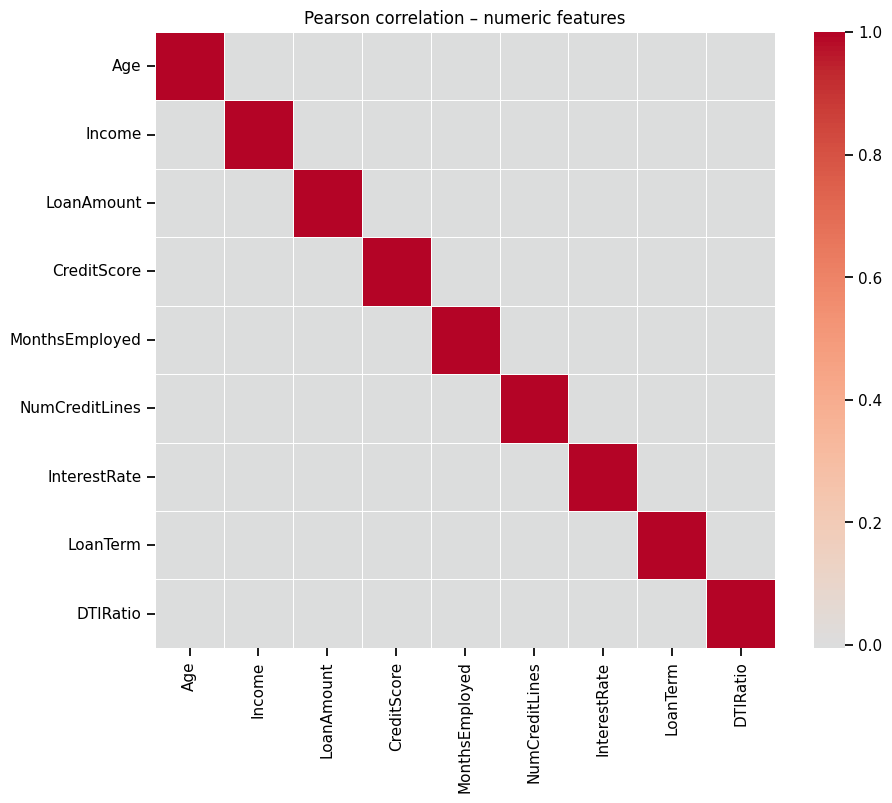

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(method="pearson"),
            cmap="coolwarm", center=0, linewidths=.5)
plt.title("Pearson correlation – numeric features")
plt.show()

In [19]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

In [20]:
from pages.A_Explore_Preprocess_Dataset import one_hot_encode_feature 
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = one_hot_encode_feature(df, categorical_cols)

2025-05-13 22:42:27.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:27.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:27.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:27.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:27.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:27.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [21]:
print(df.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes',
       'HasDependents_No', 'HasDependents_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_No', 'HasCoSigner_Yes'],
      dtype='object')


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

seed = 42
np.random.seed(seed)

num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
target   = 'Default'

X = df.drop(columns=[target]).copy()
y = df[target].copy()

# -------- 1.2  Train / test split (stratified) ----------
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=seed)
train_idx, test_idx = next(sss.split(X, y))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx].values, y.iloc[test_idx].values

# -------- 1.3  Standard-scale numeric features ----------
scaler = StandardScaler().fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test [num_cols] = scaler.transform(X_test [num_cols])


/var/folders/6m/b61mk3xj41d29b66x2p3pggw0000gn/T/ipykernel_33108/1258086766.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.transform(X_train[num_cols])
/var/folders/6m/b61mk3xj41d29b66x2p3pggw0000gn/T/ipykernel_33108/1258086766.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test [num_cols] = scaler.transform(X_test [num_cols])


In [23]:
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.copy()
y_test_np = y_test.copy()

In [24]:
from pages.C_Test_Model import compute_accuracy, compute_precison_recall

def test_model(model, X_train, y_train, X_val, y_val):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    train_acc = compute_accuracy(y_pred_train, y_train)
    train_precision, train_recall = compute_precison_recall(y_pred_train, y_train)

    val_acc = compute_accuracy(y_pred_val, y_val)
    val_precision, val_recall = compute_precison_recall(y_pred_val, y_val)

    print(f"Train accuracy: {train_acc * 100:.2f}%, Train precision: {train_precision * 100:.2f}%, Train recall: {train_recall * 100:.2f}%")
    print(f"Validation accuracy: {val_acc * 100:.2f}%, Validation precision: {val_precision * 100:.2f}%, Validation recall: {val_recall * 100:.2f}%")

2025-05-13 22:42:28.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:28.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:28.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:28.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:28.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:28.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:28.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 22:42:29.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
from pages.B_Train_Model import LogisticRegression

log_model = LogisticRegression(learning_rate=.1, num_iterations=3000) # TODO: try diff learning rate, iterations
log_model.fit(X_train_np, y_train_np)

test_model(log_model, X_train_np, y_train_np, X_test_np, y_test_np)

In [ ]:
from pages.B_Train_Model import NaiveBayes

bayes_model = NaiveBayes(classes=[0, 1], alpha = 2) # 0.1, 0.5, 1.0, and 2.0
bayes_model.fit(X_train_np, y_train_np)

test_model(bayes_model, X_train_np, y_train, X_test_np, y_test_np)

Train accuracy: 88.39%, Train precision: 0.00%, Train recall: 0.00%
Validation accuracy: 88.39%, Validation precision: 0.00%, Validation recall: 0.00%


/home/salahuddin/cornell/Practical Applications in Machine Learning/Project/paml-final-proximacentauri/pages/B_Train_Model.py:349: RuntimeWarning: invalid value encountered in log
  y_pred = np.dot(X, np.log(self.W.T))


In [ ]:
from pages.B_Train_Model import SVM

svm_model = SVM(learning_rate=0.001, num_iterations=1000, lambda_param=.01) # learning_rate=0.001, num_iterations=500, lambda_param=0.01 default params - tried huge range for both without successs
svm_model.fit(X_train_np, y_train_np)
test_model(svm_model, X_train_np, y_train, X_test_np, y_test_np)

2025-05-13 20:20:25.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 20:20:25.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 20:20:25.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 20:20:25.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Train accuracy: 11.61%, Train precision: 11.61%, Train recall: 100.00%
Validation accuracy: 11.61%, Validation precision: 11.61%, Validation recall: 100.00%


In [ ]:
from pages.B_Train_Model import ANN

net = ANN(input_size=X_train.shape[1], lr=1e-3)

epochs = 30
batch  = 1024
# use these NumPy arrays in the loop
for ep in range(epochs):
    perm = np.random.permutation(len(X_train_np))
    for i in range(0, len(X_train_np), batch):
        idx  = perm[i:i+batch]
        xb   = X_train_np[idx]
        yb   = y_train_np[idx]
        loss = net.training_step(xb, yb)
        # losses.append(loss)
    print(f"epoch {ep+1}")

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30


In [ ]:
# %%  ─── Metrics for TRAIN and TEST ──────────────────────────────────────
from sklearn.metrics import (roc_auc_score, average_precision_score,
                             accuracy_score, balanced_accuracy_score,
                             precision_recall_curve, f1_score)

# ── 1. Ensure you have NumPy arrays (replace with your own vars) ─────────
X_train_np = X_train.values.astype(np.float32)   # or X_train_np already
y_train_np = y_train.copy()          # shape (n,)
X_test_np  = X_test.values.astype(np.float32)
y_test_np  = y_test.copy()

# ── 2. Probabilities from the new network ───────────────────────────────
net.training = False              # inference mode (no dropout)
probs_train = net.predict_proba(X_train_np)   # shape (n,)
probs_test  = net.predict_proba(X_test_np)

# ── 3. Threshold-free metrics (ROC-AUC, PR-AUC) ─────────────────────────
print("TRAIN ROC-AUC :", roc_auc_score(y_train_np, probs_train).round(4))
print("TRAIN PR-AUC  :", average_precision_score(y_train_np, probs_train).round(4))
print("TEST  ROC-AUC :", roc_auc_score(y_test_np , probs_test ).round(4))
print("TEST  PR-AUC  :", average_precision_score(y_test_np , probs_test ).round(4))

# ── 4. Accuracy & balanced accuracy at threshold = 0.50 ─────────────────
thr = 0.50
train_bin = (probs_train >= thr).astype(int)
test_bin  = (probs_test  >= thr).astype(int)

print(f"\nAccuracy   (@{thr:.2f}) –  TRAIN:", (accuracy_score(y_train_np, train_bin)*100).round(2), "%")
print(  "BalancedAcc(@{:.2f}) –  TRAIN:".format(thr), (balanced_accuracy_score(y_train_np, train_bin)*100).round(2), "%")
print(  "Accuracy   (@{:.2f}) –  TEST :".format(thr), (accuracy_score(y_test_np , test_bin )*100).round(2), "%")
print(  "BalancedAcc(@{:.2f}) –  TEST :".format(thr), (balanced_accuracy_score(y_test_np , test_bin )*100).round(2), "%")

# ── 5. Find threshold that maximises F1 on TRAIN, then apply to TEST ────
prec, rec, thr_arr = precision_recall_curve(y_train_np, probs_train)
f1_scores = 2*prec*rec / (prec + rec + 1e-12)
best_idx  = f1_scores.argmax()
best_thr  = thr_arr[best_idx]

print(f"\nBest-F1 threshold       : {best_thr:.3f}")

train_best = (probs_train >= best_thr).astype(int)
test_best  = (probs_test  >= best_thr).astype(int)

print("Accuracy  (@ best F1) – TRAIN:", (accuracy_score(y_train_np, train_best)*100).round(2), "%")
print("F1-score (@ best F1) – TRAIN:", (f1_score(y_train_np, train_best)).round(2))
print("Accuracy  (@ best F1) – TEST :", (accuracy_score(y_test_np , test_best )*100).round(2), "%")
print("F1-score (@ best F1) – TEST :", (f1_score(y_test_np , test_best )).round(2))


print("Best Precision : ", prec[best_idx])
print("Best Recall : ", rec[best_idx])

TRAIN ROC-AUC : 0.7125
TRAIN PR-AUC  : 0.2567
TEST  ROC-AUC : 0.7186
TEST  PR-AUC  : 0.2628

Accuracy   (@0.50) –  TRAIN: 88.4 %
BalancedAcc(@0.50) –  TRAIN: 50.7 %
Accuracy   (@0.50) –  TEST : 88.43 %
BalancedAcc(@0.50) –  TEST : 50.7 %

Best-F1 threshold       : 0.184
Accuracy  (@ best F1) – TRAIN: 77.54 %
F1-score (@ best F1) – TRAIN: 0.32
Accuracy  (@ best F1) – TEST : 77.33 %
F1-score (@ best F1) – TEST : 0.33
Best Precision :  0.24876400417290334
Best Recall :  0.46239777421802547
